In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow

from numpy import *
from math import sqrt
from pandas import *
from datetime import datetime, timedelta

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional
from tensorflow.keras.layers import BatchNormalization, Embedding, TimeDistributed, LeakyReLU
from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.optimizers import Adam

from matplotlib import pyplot
from pickle import load


In [8]:
# import data

X_train = np.load("X_train.npy", allow_pickle=True)
y_train = np.load("y_train.npy", allow_pickle=True)
X_test = np.load("X_test.npy", allow_pickle=True)
y_test = np.load("y_test.npy", allow_pickle=True)
yc_train = np.load("yc_train.npy", allow_pickle=True)
yc_test = np.load("yc_test.npy", allow_pickle=True)

Epoch 1/50
28/28 - 4s - loss: 0.0572 - val_loss: 0.0597 - 4s/epoch - 158ms/step
Epoch 2/50
28/28 - 0s - loss: 0.0309 - val_loss: 0.1619 - 173ms/epoch - 6ms/step
Epoch 3/50
28/28 - 0s - loss: 0.0478 - val_loss: 0.0972 - 177ms/epoch - 6ms/step
Epoch 4/50
28/28 - 0s - loss: 0.0758 - val_loss: 0.0156 - 168ms/epoch - 6ms/step
Epoch 5/50
28/28 - 0s - loss: 0.0049 - val_loss: 0.0181 - 172ms/epoch - 6ms/step
Epoch 6/50
28/28 - 0s - loss: 0.0076 - val_loss: 0.0115 - 174ms/epoch - 6ms/step
Epoch 7/50
28/28 - 0s - loss: 0.0092 - val_loss: 0.0077 - 174ms/epoch - 6ms/step
Epoch 8/50
28/28 - 0s - loss: 0.0045 - val_loss: 0.0084 - 178ms/epoch - 6ms/step
Epoch 9/50
28/28 - 0s - loss: 0.0031 - val_loss: 0.0114 - 200ms/epoch - 7ms/step
Epoch 10/50
28/28 - 0s - loss: 0.0046 - val_loss: 0.0159 - 211ms/epoch - 8ms/step
Epoch 11/50
28/28 - 0s - loss: 0.0023 - val_loss: 0.0132 - 205ms/epoch - 7ms/step
Epoch 12/50
28/28 - 0s - loss: 0.0032 - val_loss: 0.0070 - 215ms/epoch - 8ms/step
Epoch 13/50
28/28 - 0s - l

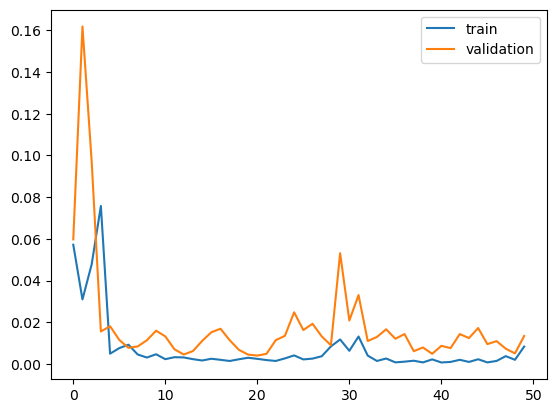

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirecti  (None, 256)               147456    
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 163969 (640.50 KB)
Trainable params: 163969 (640.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


/Users/kendrickwinata/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


None
0.11578619920295942


In [9]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error, mean_absolute_percentage_error

#Parameters
LR = 0.001
BATCH_SIZE = 64
N_EPOCH = 50

input_dim = X_train.shape[1]
feature_size = X_train.shape[2]
output_dim = y_train.shape[1]

def basic_lstm(input_dim, feature_size):
    model = Sequential()
    model.add(Bidirectional(LSTM(units= 128), input_shape=(input_dim, feature_size)))
    model.add(Dense(64))
    model.add(Dense(units=output_dim))
    model.compile(optimizer=Adam(lr = LR), loss='mse')
    history = model.fit(X_train, y_train, epochs=N_EPOCH, batch_size=BATCH_SIZE, validation_data=(X_test, y_test),
                        verbose=2, shuffle=False)

    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='validation')
    pyplot.legend()
    pyplot.show()

    return model

model = basic_lstm(input_dim, feature_size)
model.save('LSTM_3to1.h5')
print(model.summary())

yhat = model.predict(X_test, verbose=0)
#print(yhat)

rmse = sqrt(mean_squared_error(y_test, yhat))
print(rmse)



real price             real_price  real_price  real_price  real_price  real_price  \
2013-01-07   27.860001         NaN         NaN         NaN         NaN   
2013-01-08         NaN   27.809999         NaN         NaN         NaN   
2013-01-09         NaN         NaN   27.315001         NaN         NaN   
2013-01-10         NaN         NaN         NaN       27.27         NaN   
2013-01-11         NaN         NaN         NaN         NaN   27.504999   
...                ...         ...         ...         ...         ...   
2019-12-23         NaN         NaN         NaN         NaN         NaN   
2019-12-24         NaN         NaN         NaN         NaN         NaN   
2019-12-26         NaN         NaN         NaN         NaN         NaN   
2019-12-27         NaN         NaN         NaN         NaN         NaN   
2019-12-30         NaN         NaN         NaN         NaN         NaN   

            real_price  real_price  real_price  real_price  real_price  ...  \
2013-01-07         Na

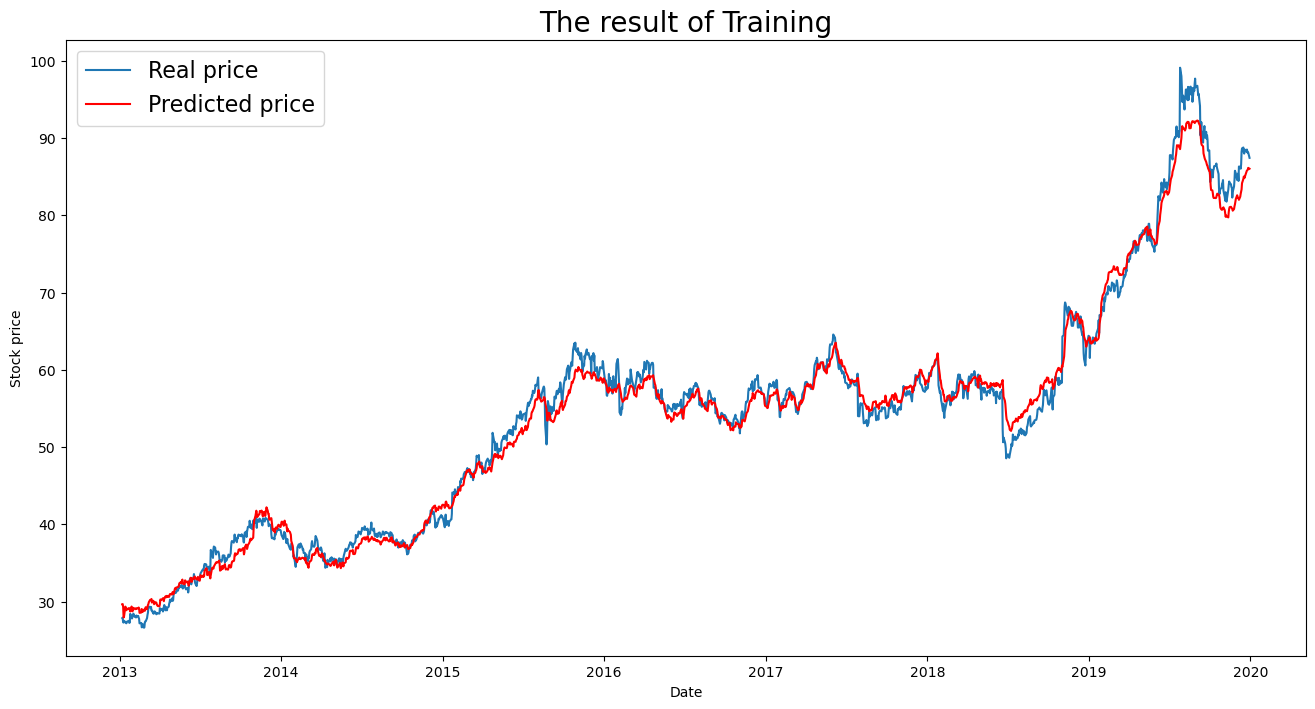

-- Train RMSE --  1.6994287705763043
-- MAE --  1.3242618863441085
-- R2 --  0.9875946429502024
-- MSLE --  0.0009158368965057699
-- MAPE --  0.02496086231068405
real price             real_price  real_price  real_price  real_price  real_price  \
2013-01-07   27.860001         NaN         NaN         NaN         NaN   
2013-01-08         NaN   27.809999         NaN         NaN         NaN   
2013-01-09         NaN         NaN   27.315001         NaN         NaN   
2013-01-10         NaN         NaN         NaN       27.27         NaN   
2013-01-11         NaN         NaN         NaN         NaN   27.504999   
...                ...         ...         ...         ...         ...   
2019-12-23         NaN         NaN         NaN         NaN         NaN   
2019-12-24         NaN         NaN         NaN         NaN         NaN   
2019-12-26         NaN         NaN         NaN         NaN         NaN   
2019-12-27         NaN         NaN         NaN         NaN         NaN   
2019-12-30   

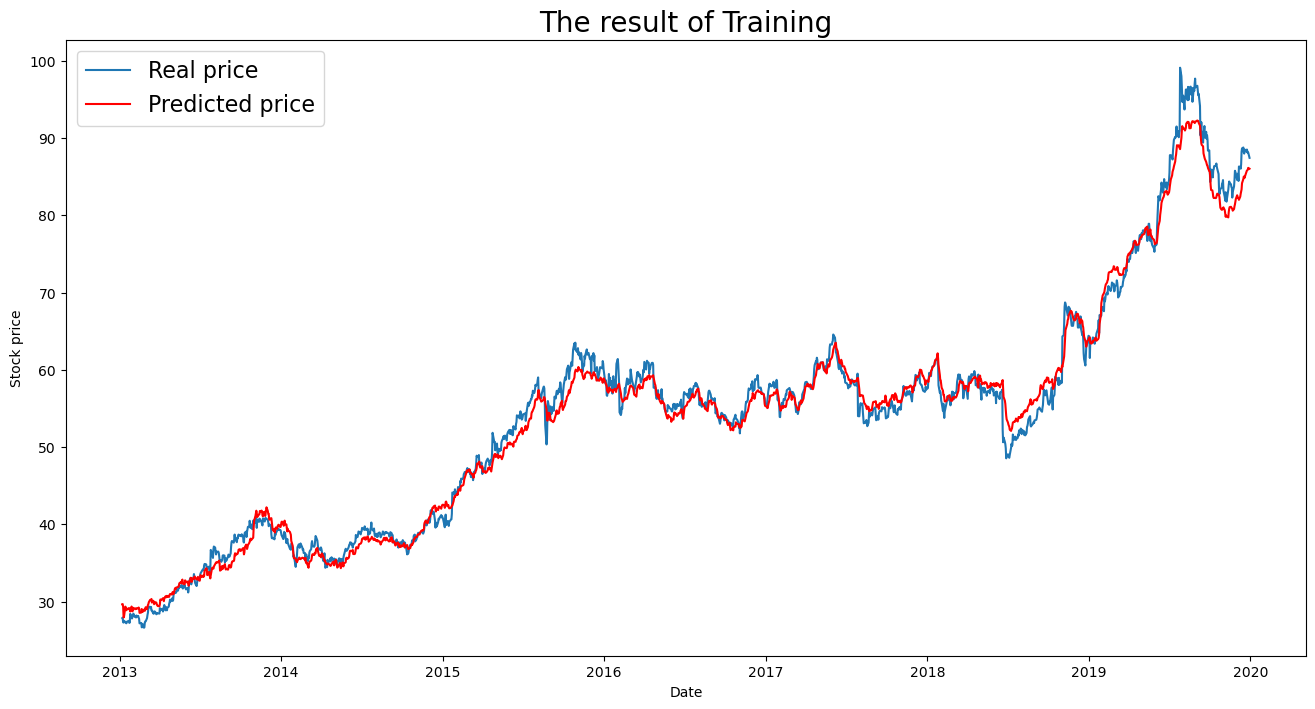

-- Train RMSE --  1.6994287705763043
-- MAE --  1.3242618863441085
-- R2 --  0.9875946429502024
-- MSLE --  0.0009158368965057699
-- MAPE --  0.02496086231068405
----- Train_RMSE_LSTM ----- (            predicted_price  predicted_price  predicted_price  \
2013-01-07        29.646061              NaN              NaN   
2013-01-08              NaN        29.669676              NaN   
2013-01-09              NaN              NaN         29.29784   
2013-01-10              NaN              NaN              NaN   
2013-01-11              NaN              NaN              NaN   
...                     ...              ...              ...   
2019-12-23              NaN              NaN              NaN   
2019-12-24              NaN              NaN              NaN   
2019-12-26              NaN              NaN              NaN   
2019-12-27              NaN              NaN              NaN   
2019-12-30              NaN              NaN              NaN   

            predicted_price 

In [10]:
# %% --------------------------------------- Plot the TRAIN result  -----------------------------------------------------------------
## TRAIN DATA
def plot_traindataset_result(X_train, y_train):


    train_yhat = model.predict(X_train, verbose=0)

    X_scaler = load(open('X_scaler.pkl', 'rb'))
    y_scaler = load(open('y_scaler.pkl', 'rb'))
    train_predict_index = np.load("index_train.npy", allow_pickle=True)

    rescaled_real_y = y_scaler.inverse_transform(y_train)
    rescaled_predicted_y = y_scaler.inverse_transform(train_yhat)

    predict_result = pd.DataFrame()
    for i in range(rescaled_predicted_y.shape[0]):
        y_predict = pd.DataFrame(rescaled_predicted_y[i], columns=["predicted_price"],
                                 index=train_predict_index[i:i + output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)
    #
    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        y_train = pd.DataFrame(rescaled_real_y[i], columns=["real_price"],
                               index=train_predict_index[i:i + output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)

    print('real price', real_price)
    print('prediction', predict_result)
    #
    # Plot the predicted result
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color='r')
    plt.xlabel("Date")
    plt.ylabel("Stock price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of Training", fontsize=20)
    plt.show()

    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    print('-- Train RMSE -- ', RMSE)

    # Calculate MAE
    MAE = mean_absolute_error(real, predicted)
    print('-- MAE -- ', MAE)

    # Calculate R2
    R2 = r2_score(real, predicted)
    print('-- R2 -- ', R2)

    # Calculate MSLE
    MSLE = mean_squared_log_error(real, predicted)
    print('-- MSLE -- ', MSLE)

    # Calculate MAPE
    MAPE = mean_absolute_percentage_error(real, predicted)
    print('-- MAPE -- ', MAPE)

    return predict_result, RMSE, MAE, R2, MSLE, MAPE
    
train_predicted, train_RMSE, train_MAE, train_R2, train_MSLE, train_MAPE  = plot_traindataset_result(X_train, y_train)

train_RMSE = plot_traindataset_result(X_train, y_train)
print("----- Train_RMSE_LSTM -----", train_RMSE)

real price             real_price  real_price  real_price  real_price  real_price  \
2019-12-31   87.919998         NaN         NaN         NaN         NaN   
2020-01-02         NaN   89.349998         NaN         NaN         NaN   
2020-01-03         NaN         NaN   88.830002         NaN         NaN   
2020-01-06         NaN         NaN         NaN   88.129997         NaN   
2020-01-07         NaN         NaN         NaN         NaN   87.860001   
...                ...         ...         ...         ...         ...   
2022-12-23         NaN         NaN         NaN         NaN         NaN   
2022-12-27         NaN         NaN         NaN         NaN         NaN   
2022-12-28         NaN         NaN         NaN         NaN         NaN   
2022-12-29         NaN         NaN         NaN         NaN         NaN   
2022-12-30         NaN         NaN         NaN         NaN         NaN   

            real_price  real_price  real_price  real_price  real_price  ...  \
2019-12-31         Na

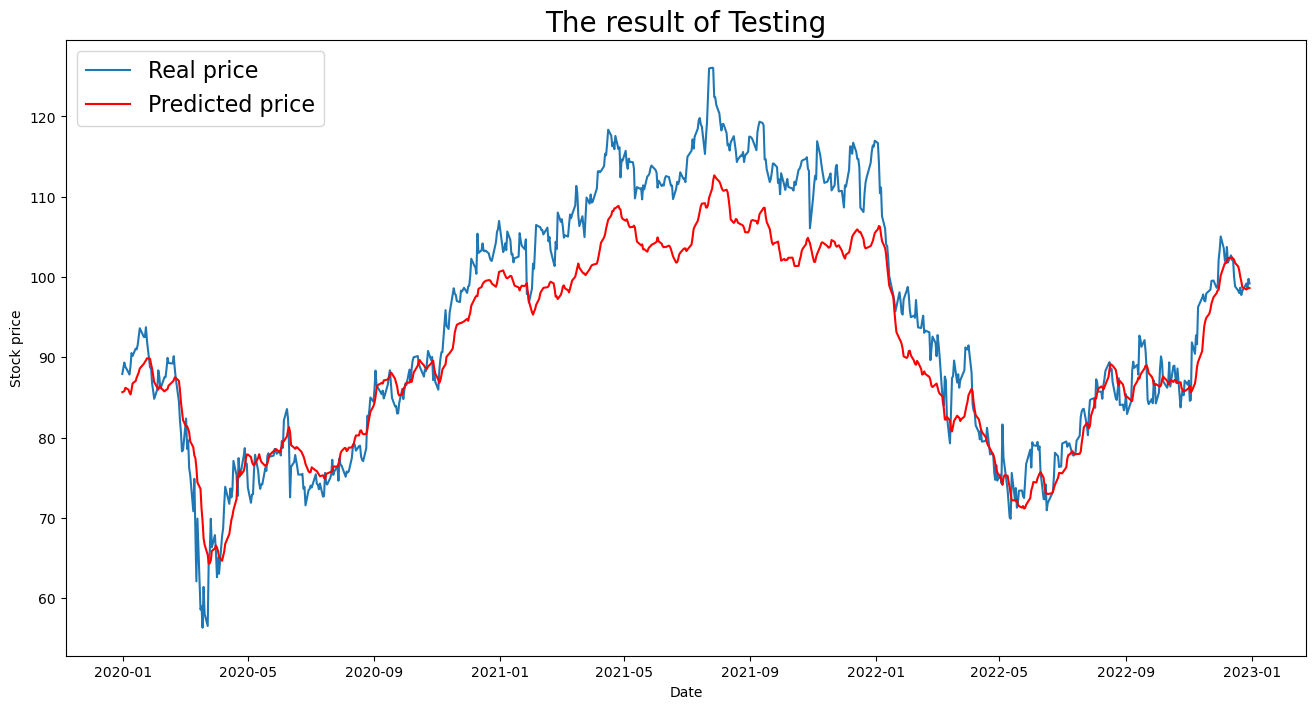

-- Test RMSE --  5.757758035820021
-- MAE --  4.5574662250462925
-- R2 --  0.860680329957
-- MSLE --  0.0032657587733680078
-- MAPE --  0.045778827408476934


In [11]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error, mean_absolute_percentage_error

def plot_testdataset_result(X_test, y_test):

    test_yhat = model.predict(X_test, verbose=0)
    y_scaler = load(open('y_scaler.pkl', 'rb'))
    test_predict_index = np.load("index_test.npy", allow_pickle=True)

    rescaled_real_y = y_scaler.inverse_transform(y_test)
    rescaled_predicted_y = y_scaler.inverse_transform(test_yhat)

    # print('reschaled real y', rescaled_real_y)
    # print('rescaled predicted y', rescaled_predicted_y.shape[0])

    predict_result = pd.DataFrame()
    for i in range(rescaled_predicted_y.shape[0]):
        y_predict = pd.DataFrame(rescaled_predicted_y[i], columns=["predicted_price"],
                                 index=test_predict_index[i:i + output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        y_train = pd.DataFrame(rescaled_real_y[i], columns=["real_price"],
                               index=test_predict_index[i:i + output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)

    print('real price', real_price)
    print('prediction', predict_result)

    # Plot the predicted result
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color='r')
    plt.xlabel("Date")
    plt.ylabel("Stock price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of Testing", fontsize=20)
    plt.show()

    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    print('-- Test RMSE -- ', RMSE)

    # Calculate MAE
    MAE = mean_absolute_error(real, predicted)
    print('-- MAE -- ', MAE)

    # Calculate R2
    R2 = r2_score(real, predicted)
    print('-- R2 -- ', R2)

    # Calculate MSLE
    MSLE = mean_squared_log_error(real, predicted)
    print('-- MSLE -- ', MSLE)

    # Calculate MAPE
    MAPE = mean_absolute_percentage_error(real, predicted)
    print('-- MAPE -- ', MAPE)

    return predict_result, RMSE, MAE, R2, MSLE, MAPE

test_predicted, test_RMSE, test_MAE, test_R2, test_MSLE, test_MAPE = plot_testdataset_result(X_test, y_test)
test_predicted.to_csv("test_predicted_final.csv")



In [12]:
test_RMSE

5.757758035820021